In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import numpy as np
from random import randint
import keras
from keras.datasets import mnist
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers.merge import Concatenate
from keras.layers import Input, Reshape, Dense, Conv2D, Dropout, \
    MaxPooling2D, Flatten, UpSampling2D, Multiply, Activation, AveragePooling2D, \
    Add, Subtract, Lambda
from keras.callbacks import ModelCheckpoint, TensorBoard
from scipy.ndimage import gaussian_filter as blur
from keras.optimizers import Adam
from keras.utils import multi_gpu_model as mgpu
from keras.utils import np_utils
import os, sys

In [2]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [20]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
hist = model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_test, Y_test))

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 2s 31us/step - loss: 0.0304 - acc: 0.9897 - val_loss: 0.0716 - val_acc: 0.9809
Epoch 2/4
60000/60000 [==============================] - 1s 24us/step - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0703 - val_acc: 0.9814
Epoch 3/4
60000/60000 [==============================] - 1s 24us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0763 - val_acc: 0.9799
Epoch 4/4
60000/60000 [==============================] - 1s 24us/step - loss: 0.0218 - acc: 0.9927 - val_loss: 0.0623 - val_acc: 0.9835


{'loss': [0.044472621015831826, 0.039077728212376435, 0.033268035069232184, 0.03176388057594498], 'val_loss': [0.06868477568551898, 0.06442550273109228, 0.0719568014901015, 0.07012953716279008]}


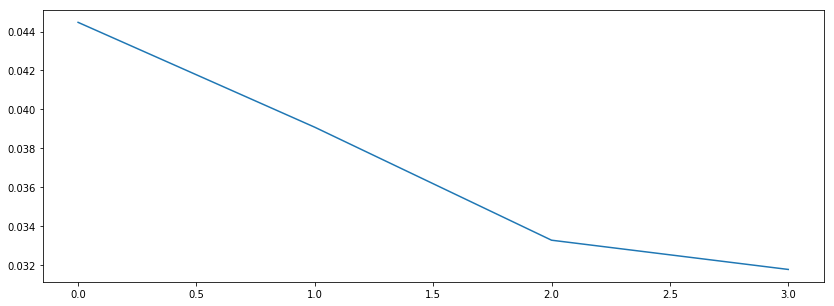

In [18]:
print(hist.history)

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(hist.history['loss'])
plt.show()
plt.close()